For this first iteration of the model I will follow this [guide](https://ipython-books.github.io/124-simulating-a-partial-differential-equation-reaction-diffusion-systems-and-turing-patterns/) using my own diffusion model:

$$\frac{\partial C(x,t)}{\partial t} = D \nabla ^2 C (x,t)$$

Where $\nabla ^2$ is divergence of the gradient of $C$, also known as the laplacian, which we use the following approximation for:
$$\

We will also assume initial conditions of $C(x,t=0) = 0 \ [0 > x \geq x_{max}], \quad C(x=0,t=0) = C_{max}$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import bokeh.io
import bokeh.plotting

bokeh.io.output_notebook()
%load_ext line_profiler


Loading BokehJS ...

In [10]:
# The constraint of the einstien stokes diffusion equation is such that D < (dx^2)/2dt
D = 0.001

In [11]:
x_size = 200
x_max = 1
dx = x_max/x_size

t_max = 10
print((dx*dx)/(2*D))
dt = 0.01
n_iter = int(t_max/dt)

0.0125


In [12]:
C = np.zeros(x_size)
C[0] = 1

In [13]:
def laplacian1D(Z):
    Zleft = Z[0:-2]
    Zright = Z[2:]
    Zcenter = Z[1:-1]
    return (Zleft + Zright -2 * Zcenter) / dx**2

0.4
0.40000000000000013
0.3999999999999999
0.39999999999999997
0.39999999999999986
0.40000000000000013
0.3999999999999999
0.39999999999999974
0.40000000000000013
0.3999999999999999
0.39999999999999997
0.3999999999999999
0.39999999999999974
0.4000000000000002
0.39999999999999997
0.40000000000000024
0.39999999999999986
0.3999999999999999
0.39999999999999986
0.3999999999999997
0.39999999999999986
0.4
0.3999999999999999
0.40000000000000013
0.3999999999999999
0.39999999999999974
0.39999999999999986
0.39999999999999986
0.39999999999999997
0.3999999999999993
0.3999999999999998
0.3999999999999998
0.39999999999999986
0.3999999999999998
0.39999999999999997
0.3999999999999999
0.39999999999999986
0.3999999999999999
0.39999999999999997
0.39999999999999974
0.3999999999999994
0.3999999999999999
0.40000000000000013
0.3999999999999998
0.3999999999999999
0.40000000000000013
0.39999999999999986
0.39999999999999974
0.39999999999999947


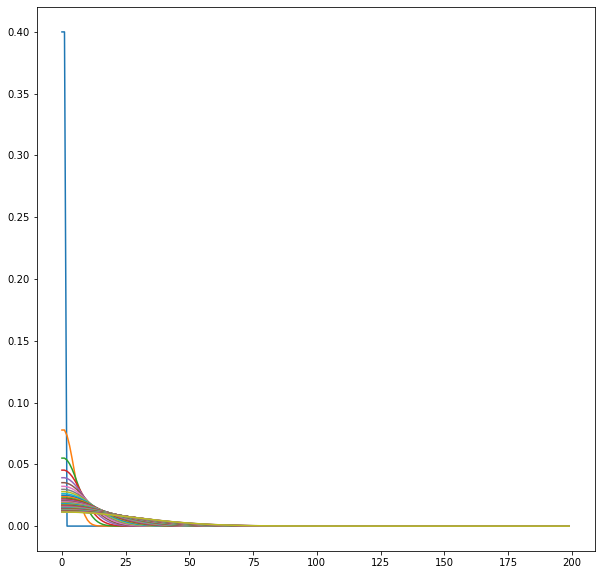

In [14]:
i_plot = np.round(np.linspace(0,t_max/dt,50))
plt. figure(figsize = (10,10))
plot_obj = bokeh.plotting.figure(plot_width = 900, plot_height = 600, x_axis_label = 'time', y_axis_label = 'C')
for i in range(n_iter): 
    deltaC = laplacian1D(C)
    Cc = C[1:-1]
    C[1:-1] = Cc + dt*(D * deltaC)
    
    for Z in (C,):
        Z[0] = Z[1]
        Z[-1] = Z[-2]
        
    if i in i_plot:
        print(sum(Cc))
#         plot_obj.line(np.linspace(0, x_max, x_size), C, line_width = 1)
        plt.plot(C)
        
# bokeh.io.show(bokeh.layouts.gridplot([plot_obj], ncols = 1))

# Creating nutrient model for biofilm model

Starting with the diffusion equation from before:
$$\frac{\partial N(x,t)}{\partial t} = D \nabla ^2 N (x,t)$$
Now to add nutrient diffusion from the agar, we will assume this happens at a constant rate into x=0:
$$\frac{\partial N(x=0,t)}{\partial t} = D_A A$$
$$\frac{dA}{dt}= - D_A A$$

In [19]:
# The constraint of the einstien stokes diffusion equation is such that D < (dx^2)/2dt
D =   0.000005
D_A = 0.00005
A = 100

In [20]:
x_size = 200
x_max = 1
dx = x_max/x_size

t_max = 60*60*30
print((dx*dx)/(2*D))
dt = 1
n_iter = int(t_max/dt)

2.5


In [21]:
C = np.zeros(x_size)

In [22]:
def laplacian1D(Z):
    Zleft = Z[0:-2]
    Zright = Z[2:]
    Zcenter = Z[1:-1]
    return (Zleft + Zright -2 * Zcenter) / dx**2


A:  100 C:  0.0 Total:  100.0
A:  89.56525187766145 C:  10.434748122338503 Total:  99.99999999999996
A:  80.21934343908943 C:  19.780656560910547 Total:  99.99999999999997
A:  71.84865700582687 C:  28.151342994173184 Total:  100.00000000000006
A:  64.3514306179861 C:  35.64856938201423 Total:  100.00000000000033
A:  57.636520919877775 C:  42.36347908012242 Total:  100.0000000000002
A:  51.62229513540954 C:  48.3777048645906 Total:  100.00000000000014
A:  46.23332688112599 C:  53.76667311887398 Total:  99.99999999999997
A:  41.40899567250292 C:  58.59100432749689 Total:  99.9999999999998
A:  37.08807127408711 C:  62.91192872591255 Total:  99.99999999999966
A:  33.21802445320272 C:  66.78197554679703 Total:  99.99999999999974
A:  29.751807270294247 C:  70.24819272970541 Total:  99.99999999999966
A:  26.647281119795508 C:  73.35271888020432 Total:  99.99999999999983
A:  23.866704453493387 C:  76.13329554650639 Total:  99.99999999999977
A:  21.376273958668364 C:  78.6237260413314 Total:  9

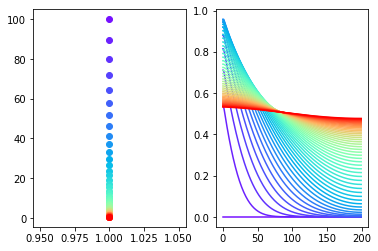

In [23]:
i_plot = np.round(np.linspace(0,t_max/dt,50))
colors = plt.get_cmap("rainbow", 50)
color_index = 0
fig, (ax1, ax2) = plt.subplots(1, 2)
plot_obj = bokeh.plotting.figure(plot_width = 900, plot_height = 600, x_axis_label = 'time', y_axis_label = 'C')
for i in range(n_iter): 
    if i in i_plot:
        color_index = color_index + 1
        print("A: ",A, "C: ", sum(C[1:-1]), "Total: ", A + sum(C[1:-1]))
    #         plot_obj.line(np.linspace(0, x_max, x_size), C, line_width = 1)

    #         plt.plot(A,1, color = colors(color_index))
        ax1.scatter(1, A, color = colors(color_index))
        ax2.plot(C, color = colors(color_index))
    
    C[0] = C[0] + dt*(D_A * A)
    C[1] = C[1] + dt*(D_A * A)
    A = A + dt*(-D_A * A)
    deltaC = laplacian1D(C)
    Cc = C[1:-1]
    C[1:-1] = Cc + dt*(D * deltaC)
    for Z in (C,):
        Z[0] = Z[1]
        Z[-1] = Z[-2]
        


        
# bokeh.io.show(bokeh.layouts.gridplot([plot_obj], ncols = 1))

## Modelling diffusion in agar

The previous modelled the spatial diffusion of nutrients through the biofilm, but not through the agar. In this model we will model spatial diffusion of nutrients in both agar and the biofilm.

In [21]:
# C[0:199] = Agar, C[200:-1] = Biofilm
x_size = 200
x_max = 2
dx = x_max/x_size

t_max = 50
print((dx*dx)/(2*D))
dt = 0.0001
n_iter = int(t_max/dt)

0.0001


In [22]:
# The constraint of the einstien stokes diffusion equation is such that D < (dx^2)/2dt
D =   0.5
D_A = 0.0005
A = 100
D_array = 1/(1+np.exp(-10*(np.linspace(0,x_size-1,x_size)-int(x_size/2))))
D_array = D_array*(D-D_A) + D_A


C = np.zeros(x_size)
C = (1 - 1/(1+np.exp(-10*(np.linspace(0,x_size-1,x_size)-int(x_size/2)))))*A
# print(C)

<ipython-input-22-c53fff2920fd>:5: RuntimeWarning: overflow encountered in exp
  D_array = 1/(1+np.exp(-10*(np.linspace(0,x_size-1,x_size)-int(x_size/2))))
<ipython-input-22-c53fff2920fd>:10: RuntimeWarning: overflow encountered in exp
  C = (1 - 1/(1+np.exp(-10*(np.linspace(0,x_size-1,x_size)-int(x_size/2)))))*A


In [23]:
def laplacian1D(Z):
    Zleft = Z[0:-2]
    Zright = Z[2:]
    Zcenter = Z[1:-1]
    return (Zleft + Zright -2 * Zcenter) / dx**2
def diff1D(Z):
    Zleft = Z[0:-2]
    Zright = Z[2:]
    Zfarleft = [Z[1]-Z[0]]
    Zfarright = [Z[-1] - Z[-2]]
#     return np.concatenate((Zfarleft, Zright - Zleft, Zfarright)) / (2*dx)
    return (Zright - Zleft) / (2*dx)

# def diff1D(Z):
#     Zleft = Z[0:-1]
#     Zright = Z[1:]
#     return (Zright - Zleft) / (2*dx)

9950.0
9950.000000000016
9950.00000000005
9950.000000000055
9950.000000000053
9950.000000000045
9950.000000000016
9949.999999999993
9949.999999999938
9949.999999999913
9949.999999999874
9949.999999999834
9949.999999999782
9949.999999999774
9949.999999999702
9949.999999999667
9949.999999999654
9949.999999999465
9949.999999999443
9949.99999999943
9949.99999999942
9949.999999999412
9949.99999999942
9949.999999999416
9949.999999999422
9949.999999999422
9949.999999999418
9949.999999999416
9949.99999999942
9949.999999999402
9949.99999999941
9949.999999999403
9949.999999999403
9949.999999999403
9949.99999999941
9949.999999999409
9949.999999999409
9949.999999999398
9949.999999999383
9949.999999999394
9949.999999999376
9949.999999999382
9949.99999999938
9949.999999999387
9949.99999999937
9949.999999999365
9949.999999999367
9949.999999999362
9949.999999999356


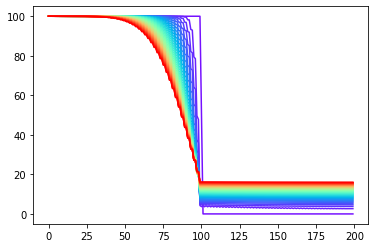

In [24]:
i_plot = np.round(np.linspace(0,t_max/dt,50))
colors = plt.get_cmap("rainbow", 50)
color_index = 0
fig, (ax1) = plt.subplots(1, 1)
plot_obj = bokeh.plotting.figure(plot_width = 900, plot_height = 600, x_axis_label = 'time', y_axis_label = 'C')
for i in range(n_iter): 
    if i in i_plot:
        print(sum(C[1:-1]))
        color_index = color_index + 1
#         print(A)
    #         plot_obj.line(np.linspace(0, x_max, x_size), C, line_width = 1)

    #         plt.plot(A,1, color = colors(color_index))
        ax1.plot(C, color = colors(color_index))
        
#     deltaC = D_array*diff1D(C)
#     
    
    
    
    deltaC = np.gradient(C, dx, edge_order = 2)
#     deltaC = D_array*np.concatenate(([deltaC[0]], deltaC, [deltaC[-1]]))
    deltaC = D_array*deltaC
    
    C = C + (dt*(np.gradient(deltaC, dx, edge_order = 2)))
    
    for Z in (C,):
        Z[0] = Z[1]
        Z[-1] = Z[-2]

        
# bokeh.io.show(bokeh.layouts.gridplot([plot_obj], ncols = 1))

In [ ]:
D_array

In [ ]:
# The constraint of the einstien stokes diffusion equation is such that D < (dx^2)/2dt
D =   0.005
D_A = 0.0005
A = 100
D_array = np.concatenate((np.ones(200)*D_A,np.ones(200)*D))

In [ ]:
# C[0:199] = Agar, C[200:-1] = Biofilm
x_size = 400
x_max = 2
dx = x_max/x_size

t_max = 60
print((dx*dx)/(2*D))
dt = 0.001
n_iter = int(t_max/dt)

In [ ]:
C = np.zeros(x_size)
C[0:199] = 10

In [ ]:
def laplacian1D(Z):
    Zleft = np.concatenate(([Z[0]], Z[0:-1]))
    Zright = np.concatenate((Z[1:], [Z[-1]]))
    Zcenter = Z
    return (Zleft + Zright -2 * Zcenter) / dx**2

In [ ]:
i_plot = np.round(np.linspace(0,t_max/dt,50))
colors = plt.get_cmap("rainbow", 50)
color_index = 0
fig, (ax1) = plt.subplots(1, 1)
plot_obj = bokeh.plotting.figure(plot_width = 900, plot_height = 600, x_axis_label = 'time', y_axis_label = 'C')
for i in range(n_iter): 
    if i in i_plot:
        print(sum(C[1:-1]))
        color_index = color_index + 1
#         print(A)
    #         plot_obj.line(np.linspace(0, x_max, x_size), C, line_width = 1)

    #         plt.plot(A,1, color = colors(color_index))
        ax1.plot(C, color = colors(color_index))
        
    deltaC = laplacian1D(C)
#     Cc = C[1:-1]
    
    C = C + dt*(D_array * deltaC)
    
#     for Z in (C,):
#         Z[0] = Z[1]
#         Z[-1] = Z[-2]

        
# bokeh.io.show(bokeh.layouts.gridplot([plot_obj], ncols = 1))

In [ ]:
a = [1,2,3,4]

In [ ]:
[a[0]] + a[0:-1]

In [ ]:
a[1:] + [a[-1]]

In [ ]:
a

In [30]:
np.concatenate((np.ones(4), np.zeros(0)))

array([1., 1., 1., 1.])

In [188]:
len(np.gradient(C, dx))

400

In [195]:
a = [1,1,1,2,2,2,3,4]
len(a)

8

In [194]:
np.gradient(a)

array([0. , 0. , 0.5, 0.5, 0. , 0.5, 1. , 1. ])

In [200]:
D_array

array([5.00000000e-06, 5.00000000e-06, 5.00000000e-06, 5.00000000e-06,
       5.00000000e-06, 5.00000000e-06, 5.00000000e-06, 5.00000000e-06,
       5.00000000e-06, 5.00000000e-06, 5.00000000e-06, 5.00000000e-06,
       5.00000000e-06, 5.00000000e-06, 5.00000000e-06, 5.00000000e-06,
       5.00000000e-06, 5.00000000e-06, 5.00000000e-06, 5.00000000e-06,
       5.00000000e-06, 5.00000000e-06, 5.00000000e-06, 5.00000000e-06,
       5.00000000e-06, 5.00000000e-06, 5.00000000e-06, 5.00000000e-06,
       5.00000000e-06, 5.00000000e-06, 5.00000000e-06, 5.00000000e-06,
       5.00000000e-06, 5.00000000e-06, 5.00000000e-06, 5.00000000e-06,
       5.00000000e-06, 5.00000000e-06, 5.00000000e-06, 5.00000000e-06,
       5.00000000e-06, 5.00000000e-06, 5.00000000e-06, 5.00000000e-06,
       5.00000000e-06, 5.00000000e-06, 5.00000000e-06, 5.00000000e-06,
       5.00000000e-06, 5.00000000e-06, 5.00000000e-06, 5.00000000e-06,
       5.00000000e-06, 5.00000000e-06, 5.00000000e-06, 5.00000000e-06,
      